### Introduction

The Project Description required us to choose a data based on our own interests. After some thoughts I came up with the theme I now spend most time exploring about and one of the webpages I use for that purpose. As a senior year student I go a lot through the universities' webpages and usually as first step I check their rankings.
<br>Therefore, after consideration of several rankings webpages, I chose probably the most famous - QS World Rankings, because it seemed to contain most of detailed information and statistics. Among all variations of rankings, for this project _"QS World University Rankings 2021"_ https://www.topuniversities.com/university-rankings/world-university-rankings/2021 was examined. 
<br>The webpages of each university contained number of different information and details. Considering the information available, in this project it was decided to focus on the proportions of the international students in the universities in different regions. After some considerations, as 3 domeneering regions USA, Europe and the rest of the worlds universities were chosen. 
#### General Research Question is:
_Considering all 1000 universities from QS World Rankings 2021, is there a significant difference in average international student ratios between universities from the US, Europe and rest of the World?_
#### About the data:
Initial webpage consists of table of the universities, and while parsing, the program required to go thought the link of that university and retrieve the data from there. As expected, all universities' pages were aligned in the same structure, although not all of them had all the information. Since, to answer the research question some of the variables such as number of total students, number of international students were crucial, program skipped the universities where these values were missing. 
#### Sampling of the data
In the link above, by default, only 25 universities per list will be shown. However it can be set to show 200 universities per page. A get_data.py code imitates some actions, such as opening dropdown menu and selecting to show 200 items per page. Then, program transfers to the next 200 universities again by imitation of the clicking. In similar way, it is possible to access all the 1000 universities presented in the ranking list.
<br>Since, retrieving all 1000 universities from the list is time consuming, only a sample of those universities were parsed and processed. _Clustering_ method were used for sampling - 50 randomly selected universities were selected from each group of 200. Ex: 50 universities from each group of 1-200, 201-400, 401-600, 601-800, 801-1000 ranked intitutions were sampled. In this way, it was ensured that sample will contain universities from each ranking division. 
<br>My running of the get_data.py code resulted in 229 sample size, rather than expected 250, because as it was mentioned, some universities were skipped if they do not contain the specific variables' info. In dataset 17 variables were recorded. Some of the variables contain _categorical data_ (ex: Name, Country), _continuous numerical data_ (ex: Overall Score, Employer Reputation) and _discrete numerical values_ (ex: Total Students, Academic Faculty Staff).

__Importing the data__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
url = "data.csv"
da = pd.read_csv(url)
print("Shape of the dataset:", da.shape)
da.head()

Shape of the dataset: (229, 17)


,Name,Country,QS Global World Ranking,Status,Research Output,Total Students,Scholarships,Academic Faculty Staff,International Students,Overall Score,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,Number of International Students,Number of International Faculty
0,University of Wollongong,Australia,#196,Public,Very High,"19,103",Yes,"1,404",86,43.2,31.3,34.5,19.2,71.0,91.8,"5,721",508
1,University of Amsterdam,NaN,#=61,Public,Very High,"18,234",Yes,"2,790",61.6,69.9,82.3,55.6,35.4,83.3,84.5,"5,943",890
2,Sapienza University of Rome,Italy,#171,Public,Very High,"74,483",NaN,"3,237",10.5,46.1,78.4,33.8,5.1,46.3,4.8,"5,860",103
3,Waseda University,Japan,#=189,Private,Very High,"44,078",NaN,"3,864",36.7,44.1,58.6,93.6,30.6,7.6,31.0,"7,209",553
4,Ludwig-Maximilians-Universität München,Germany,#63,Public,Very High,"35,858",NaN,"3,818",36.2,68.9,92.9,80.7,49.1,43.9,57.6,"5,816",846


### Data Cleaning and Preparation

Some of the values such as "Total Students" were parsed in form of 5,600 instead of 5600. So, we need to put those values in the standard numeric form.

In [3]:
da.loc[:,'Total Students'] = da['Total Students'].str.replace(',', '')
da.loc[:,'Academic Faculty Staff'] = da['Academic Faculty Staff'].str.replace(',', '')
da.loc[:,'Number of International Students'] = da['Number of International Students'].str.replace(',', '')
da.loc[:,'International Students'] = da['International Students'].str.replace(',', '')

In [4]:
da=da.drop(columns = 'Scholarships', errors = 'ignore')

Convert required features to the numeric from strings:

In [5]:
da.iloc[:,5:] = da.iloc[:, 5:].apply(pd.to_numeric)
da.head()

,Name,Country,QS Global World Ranking,Status,Research Output,Total Students,Academic Faculty Staff,International Students,Overall Score,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,Number of International Students,Number of International Faculty
0,University of Wollongong,Australia,#196,Public,Very High,19103,1404,86.0,43.2,31.3,34.5,19.2,71.0,91.8,5721,508
1,University of Amsterdam,NaN,#=61,Public,Very High,18234,2790,61.6,69.9,82.3,55.6,35.4,83.3,84.5,5943,890
2,Sapienza University of Rome,Italy,#171,Public,Very High,74483,3237,10.5,46.1,78.4,33.8,5.1,46.3,4.8,5860,103
3,Waseda University,Japan,#=189,Private,Very High,44078,3864,36.7,44.1,58.6,93.6,30.6,7.6,31.0,7209,553
4,Ludwig-Maximilians-Universität München,Germany,#63,Public,Very High,35858,3818,36.2,68.9,92.9,80.7,49.1,43.9,57.6,5816,846


Create a new feature indicating the region of the university:

In [6]:
da.Country.unique()

array(['Australia', nan, 'Italy', 'Japan', 'Germany', 'South Korea',
       'United States', 'United Kingdom', 'Hong Kong S.A.R.', 'Israel',
       'Spain', 'Sweden', 'Argentina', 'Finland', 'Saudi Arabia',
       'New Zealand', 'Russia', 'Belgium', 'Netherlands', 'Norway',
       'India', 'Switzerland', 'Denmark', 'Malaysia', 'France',
       'Philippines', 'Canada', 'Austria', 'China Mainland', 'Taiwan',
       'Czech Republic', 'Jordan', 'Hungary', 'Lebanon', 'Thailand',
       'United Arab Emirates', 'Ukraine', 'Iran', 'Ireland', 'Mexico',
       'Pakistan', 'Colombia', 'Indonesia', 'Slovenia', 'Brazil',
       'Greece', 'Uruguay', 'Lithuania', 'Kazakhstan', 'South Africa'],
      dtype=object)

In [7]:
europe = ['United Kingdom', 'Austria','Belarus','Belgium', 'Czech Republic', 'Denmark', 'Finland' 'France', 'Germany','Greece', 'Israel', 'Ireland', 'Italy','Lithuania', 'Hungary' , 'Netherlands', 'Norway', 'Poland', 'Portugal' 'Russia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey']
da.loc[da['Country']== ('United States'), 'Region'] = 'US'
da.loc[da['Country'].isin(europe), 'Region'] = 'Europe'
da.loc[(da['Country']!= 'United States') & (~da['Country'].isin(europe)), 'Region'] = 'Rest'

## Some descriptive visualitions of data

Region
Europe     73
Rest      110
US         46
Name: Name, dtype: int64


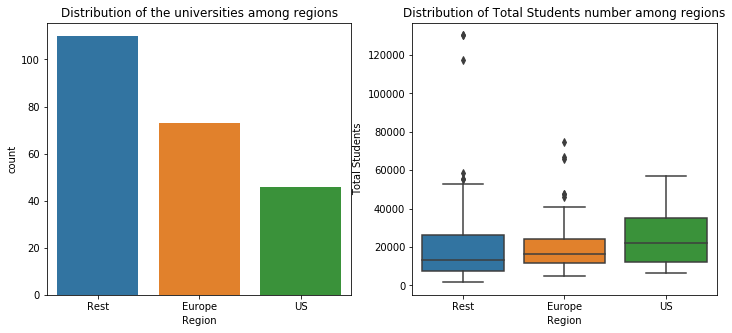

In [8]:
print(da.groupby('Region')['Name'].count())
fig, ax =plt.subplots(1,2, figsize=(12, 5))
sns.countplot(x=da['Region'], ax=ax[0]).set_title('Distribution of the universities among regions')
sns.boxplot(x="Region", y="Total Students", data=da, ax=ax[1]).set_title('Distribution of Total Students number among regions')
plt.show()

From the visualisations above, it can be seen that indeed in our sample choosen regions have comparable variables and can be used for further analysis, since each region has 30+ observations.

## Answering the RQ: Considering all 1000 universities from QS World Rankings 2021, is there a significant difference in average international student ratios between universities from the US, Europe and rest of the World?

The trivial way to answer this question is to compare the means of the international student ratios of universities group by their Regions. To compare them we can conduct a _Difference in two means hypothesis test_. 

For that purpose, first, the feature indicating the international student ratio is created:

In [9]:
da['Int Student Ratio'] = da['Number of International Students']/da['Total Students']
da['Int Faculty Ratio'] = da['Number of International Faculty']/da['Academic Faculty Staff']

Visualize the distributions of those ratios among regions:

Text(0.5, 1.0, 'Distribution of the international student ratios')

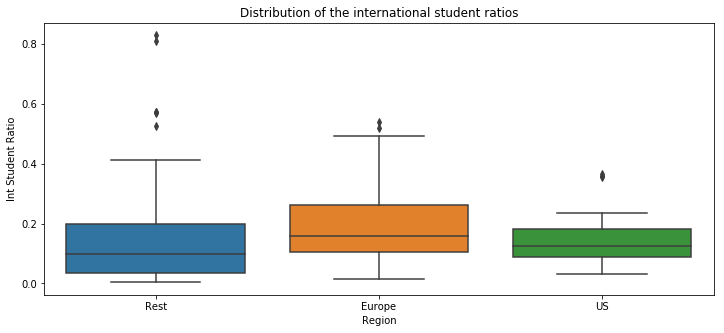

In [10]:
plt.figure(figsize=(12, 5))  
sns.boxplot(x="Region", y="Int Student Ratio", data=da).set_title('Distribution of the international student ratios')

In [11]:
ps = da[["Region", "Int Student Ratio"]]
ps_us = ps.loc[ps.Region == 'US', "Int Student Ratio"]
ps_eu = ps.loc[ps.Region == 'Europe', "Int Student Ratio"]
ps_rest = ps.loc[ps.Region == 'Rest', "Int Student Ratio"]
da.groupby('Region')['Int Student Ratio'].mean()

Region
Europe    0.196132
Rest      0.142834
US        0.142587
Name: Int Student Ratio, dtype: float64

From the boxplots and numbers above, it can be seen that in our sample the US and Rest of the World universities have relatively the same mean ratios, whereas the number for Europe universities is slightly higher. 
<br>_But, does this relation remains the same for the whole population of the 1000 universities?_

To answer this question, it seem reasonable to do 2 test only: first compare 2 statistics that seem similar: avg ratios in the US and Rest of the World, and then compare rest of the world with Europe.
<br>To conduct difference in 2 sample means test 3 assumptions must be verified:
<br> 1) Data is simple random sample - ensured by the way data is collected
<br> 2) Two means should come from independant samples - we can assume that regions are independant from each other
<br> 3) Distributions should be normal - all sample sizes for regions are large enough: >30

Testing Difference in Population Means (for Independent Groups, without equal variance assumption):

I.
<br>$H_0: \mu_{us}=\mu_{rest}$
<br>$H_1: \mu_{us}\ne \mu_{rest}$

In [12]:
print("mu_us = ", ps_us.mean())
print("mu_rest = ", ps_rest.mean())
print(sp.stats.ttest_ind(ps_us, ps_rest, equal_var=False)) 

mu_us =  0.14258690746617173
mu_rest =  0.1428343040166527
Ttest_indResult(statistic=-0.012902327700079383, pvalue=0.9897228719037136)


If we consider our $\alpha$=0.05, then pvalue > $\alpha$, therefore we __FTR the null hypothesis__

II.
<br>$H_0: \mu_{eu}=\mu_{rest}$
<br>$H_1: \mu_{eu}\ne \mu_{rest}$

In [13]:
print("mu_eu = ", ps_eu.mean())
print("mu_rest = ", ps_rest.mean())
print(sp.stats.ttest_ind(ps_eu, ps_rest, equal_var=False))

mu_eu =  0.1961321535352771
mu_rest =  0.1428343040166527
Ttest_indResult(statistic=2.5250064495788336, pvalue=0.012451762682738805)


Again, taking $\alpha$=0.05, now we __Reject the null hypothesis__
<br> __Summary:__ As we can see from the results of the 2 hypothesis tests, we can summarize that the difference in mean ratios of the universities in US and rest of the world is not significant. However, second test suggests that observing these sample mean values in Europe and rest of the world while having same population means is very unlikely. 

### Answering the RQ: another approach

To check whether indeed difference between ratios of the international students in Europe and US&Rest of the world is significant, another approach was used.

Lets' first introduce new variable, regarding as "Is internationalized?", which indicates whether certain university's International student ratio is equal or above the worlds average value:

In [14]:
da['Is intnl?'] = np.where(da['Int Student Ratio']>= da['Int Student Ratio'].mean(), True, False)
da.head()

,Name,Country,QS Global World Ranking,Status,Research Output,Total Students,Academic Faculty Staff,International Students,Overall Score,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,Number of International Students,Number of International Faculty,Region,Int Student Ratio,Int Faculty Ratio,Is intnl?
0,University of Wollongong,Australia,#196,Public,Very High,19103,1404,86.0,43.2,31.3,34.5,19.2,71.0,91.8,5721,508,Rest,0.299482,0.361823,True
1,University of Amsterdam,NaN,#=61,Public,Very High,18234,2790,61.6,69.9,82.3,55.6,35.4,83.3,84.5,5943,890,Rest,0.325930,0.318996,True
2,Sapienza University of Rome,Italy,#171,Public,Very High,74483,3237,10.5,46.1,78.4,33.8,5.1,46.3,4.8,5860,103,Europe,0.078676,0.031820,False
3,Waseda University,Japan,#=189,Private,Very High,44078,3864,36.7,44.1,58.6,93.6,30.6,7.6,31.0,7209,553,Rest,0.163551,0.143116,True
4,Ludwig-Maximilians-Universität München,Germany,#63,Public,Very High,35858,3818,36.2,68.9,92.9,80.7,49.1,43.9,57.6,5816,846,Europe,0.162195,0.221582,True


Now, we can check the difference in the proportions of the universities which are "Internationalized" in each region.

In [15]:
x_eu = da.loc[(da['Is intnl?'] == True) & (da['Region'] == "Europe"), 'Name'].count()
x_us = da.loc[(da['Is intnl?'] == True) & (da['Region'] == "US"), 'Name'].count()
x_rest = da.loc[(da['Is intnl?'] == True) & (da['Region'] == "Rest"), 'Name'].count()
n_eu = da.loc[da['Region'] == "Europe", 'Name'].count()
n_us = da.loc[da['Region'] == "US", 'Name'].count()
n_rest = da.loc[da['Region'] == "Rest", 'Name'].count()

In [16]:
p_eu = x_eu/n_eu
p_us = x_us/n_us
p_rest = x_rest/n_rest
print("Proportional of 'Internationalized' unis in Europe:",p_eu)
print("Proportional of 'Internationalized' unis in US:",p_us)
print("Proportional of 'Internationalized' unis in rest of the world:",p_rest)

Proportional of 'Internationalized' unis in Europe: 0.4931506849315068
Proportional of 'Internationalized' unis in US: 0.34782608695652173
Proportional of 'Internationalized' unis in rest of the world: 0.3090909090909091


Test of difference in population proportions:
<br>Ia.
<br>$H_0: p_{us}=p_{rest}$
<br>$H_1: p_{us}\ne p_{rest}$

In [17]:
sp.stats.ttest_ind(da.loc[da['Region'] == "Rest", 'Is intnl?'], da.loc[da['Region'] == "US", 'Is intnl?'])

Ttest_indResult(statistic=-0.47001803079244847, pvalue=0.6390070428011604)

Again, we FTR the null hypothesis.

<br>IIa.
<br>$H_0: p_{eu}=p_{rest}$
<br>$H_1: p_{eu}\ne p_{rest}$

In [18]:
print(sp.stats.ttest_ind(da.loc[da['Region'] == "Europe", 'Is intnl?'], da.loc[da['Region'] == "Rest", 'Is intnl?']))

Ttest_indResult(statistic=2.539026706294665, pvalue=0.01195801492340899)


Since pvalue < sl, we reject the H_0

### Subject of interest:
While I was describing my project to my friend, he asked an interesting question beyon the main research question of the project. His question was - __Considering the sample of the project, is there any correlation between International Students and International Faculty ratios?__

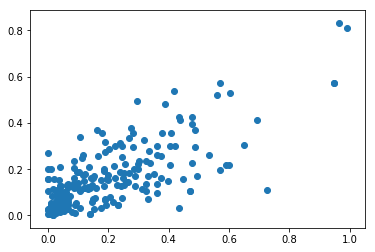

In [19]:
plt.scatter(x=da['Int Faculty Ratio'], y=da['Int Student Ratio'])
plt.show()

In [20]:
r = np.corrcoef(da['Int Faculty Ratio'], da['Int Student Ratio'])
r[0,1]

0.7433172537391041

Interestingly, indeed, there is a strong correlation between the proportion of international faculty employed and the proportion of international students admitted:)

### Conclusion
On the basis of the retrieved sample of 229 universities, research question was answered. First and trivial approach was to conduct a _Difference in Population Means_ test. All the required assumptions were verified in order for this test to work properly. Results suggested that while we cannot support the statement about significant difference in the mean ratios of the US and the rest of the world, we have evidence to expect the population of universities of Europe and the rest of the world to have different means. 
<br> To verify the answer of the RQ, alternative proportion test was conducted. Although, it actually tested a slightly different things, results corresponded to the initial tests results.
<br> In addition, to answering the focus question, this notebook also provides an interesting observation met during the work on the project.
<br><br> The __reliability__ of the answer and methodology used for the RQ can be furtherly improved by sampling more number of universities. Also, possibly, clustering so that each region will have some minimum number of universities sampled will help the accuracy of the sample statistics. 
<br><br> The sample of this project gives an information only about the universities listed in the QS rankings, which cannon be generalized to the whole universities population. If to continue this work further, I would use another ranking datasets too. Also, I encountered the problem of unstability of the QS webpages. They have thrown some errors randomly sometimes, taking a lot of time to start from the beginning. I would use another Times Higher Education Ranking instead. And finally, I really wanted to come with the question of real importance to me, but available data and, possibly, lack of imagination did not allowed to do so. So, I would spend some more time on thinking about research question that is more interesting and helpful.
